In [24]:
# !pip3 install wordcloud

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [40]:
# Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified offic...,1
3,6,NaN,NaN,13 000 people receive wildfires evacuation or...,1
4,7,NaN,NaN,just got sent photo ruby alaska smoke wildfi...,1


In [4]:
train_df.shape

(7613, 5)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
# checking if training data has missing values

print(train_df.isna().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,just happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ...
2,3,NaN,NaN,forest fire spot pond geese fleeing across st...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan


In [10]:
test_df.shape

(3263, 4)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [12]:
print(test_df.isna().sum())

id             0
keyword       26
location    1105
text           0
dtype: int64


# Data preprocessing

### Filling the missing values in 'keyword' and 'location' columns

In [13]:
# Fill missing values in 'keyword' with an empty string
train_df['keyword'] = train_df['keyword'].fillna('')

# Fill missing values in 'location' with 'Unknown'
train_df['location'] = train_df['location'].fillna('Unknown')

# Verify that missing values have been filled
print(train_df.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [14]:
# Fill missing values in 'keyword' with an empty string
test_df['keyword'] = test_df['keyword'].fillna('')

# Fill missing values in 'location' with 'Unknown'
test_df['location'] = test_df['location'].fillna('Unknown')

# Verify that missing values have been filled
print(test_df.isnull().sum())

id          0
keyword     0
location    0
text        0
dtype: int64


# Data Visualization

In [17]:
# Print the value counts for the target variable
print(train_df['target'].value_counts())

# there are 4342 tweets labeled as non-disaster (target value of 0) and 3271 tweets labeled as 
# real disaster (target value of 1).

0    4342
1    3271
Name: target, dtype: int64


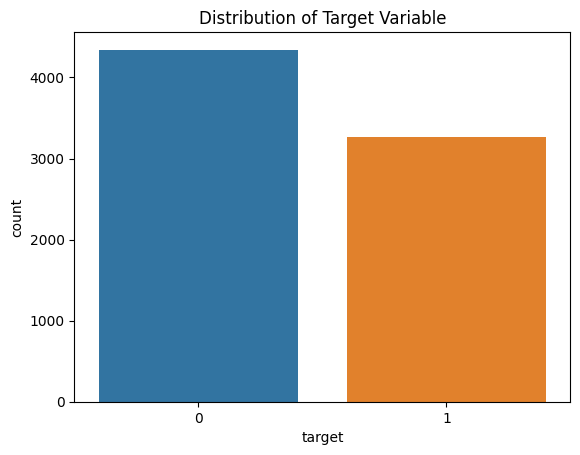

In [15]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

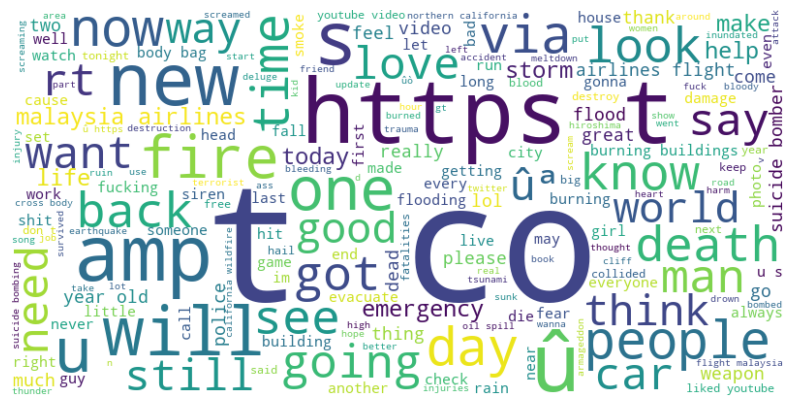

In [30]:
# create a word cloud from the tweet text

# Combine all tweet text into a single string
combined_text = ' '.join(train_df['text'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# display the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Feature Engineering

In [32]:
# can use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) 
# to convert text into numerical features.  The fit_transform method is used to both fit 
# the vectorizer to the text data and transform the text into numerical features. 

# Initialize the tf-idf vectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features = tfidf_vectorizer.fit_transform(train_df['text'])

# Display the shape of the TF-IDF features
print("TF-IDF features shape:", tfidf_features.shape)

TF-IDF features shape: (7613, 21575)


In [33]:
# The shape (7613, 21575) indicates that your TF-IDF features matrix has 7613 rows (tweets) and 21575 columns 
# (unique words in the corpus).

# Train the model

In [35]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, train_df['target'], test_size=0.2, random_state=42)

# Instantiate and train the model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
# Make the predictions on the validations set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy*100)

Validation Accuracy: 78.79185817465529


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       874
           1       0.83      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



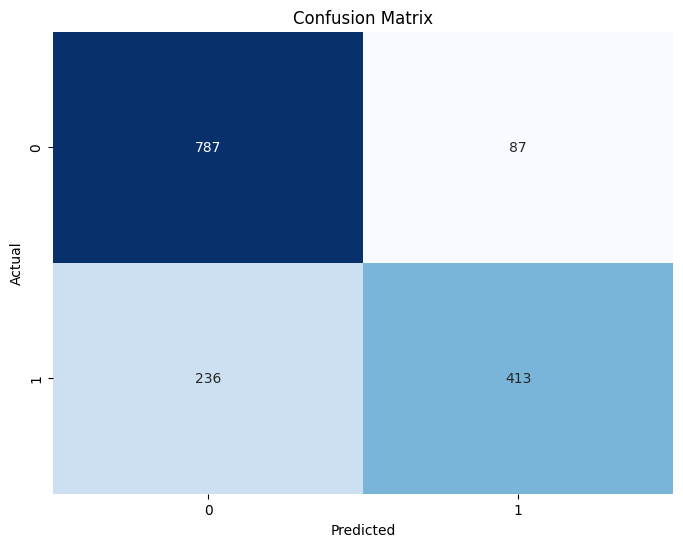

In [47]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
# Prediction on the test set

# Transform the test dataset text into TF-IDF features
test_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

# Make predictions on the test dataset
test_predictions = model.predict(test_tfidf_features)

# Create a DataFrame with the predictions
submission_df = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)